In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# Load the data
data = 'ChicagoCrimeData.csv'
df = pd.read_csv(data)

In [285]:
df.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     533 non-null    int64  
 1   CASE_NUMBER            533 non-null    object 
 2   DATE                   533 non-null    object 
 3   BLOCK                  533 non-null    object 
 4   IUCR                   533 non-null    object 
 5   PRIMARY_TYPE           533 non-null    object 
 6   DESCRIPTION            533 non-null    object 
 7   LOCATION_DESCRIPTION   533 non-null    object 
 8   ARREST                 533 non-null    bool   
 9   DOMESTIC               533 non-null    bool   
 10  BEAT                   533 non-null    int64  
 11  DISTRICT               533 non-null    int64  
 12  WARD                   490 non-null    float64
 13  COMMUNITY_AREA_NUMBER  490 non-null    float64
 14  FBICODE                533 non-null    object 
 15  X_COOR

In [287]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

ID                        0
CASE_NUMBER               0
DATE                      0
BLOCK                     0
IUCR                      0
PRIMARY_TYPE              0
DESCRIPTION               0
LOCATION_DESCRIPTION      0
ARREST                    0
DOMESTIC                  0
BEAT                      0
DISTRICT                  0
WARD                     43
COMMUNITY_AREA_NUMBER    43
FBICODE                   0
X_COORDINATE              4
Y_COORDINATE              4
YEAR                      0
LATITUDE                  4
LONGITUDE                 4
LOCATION                  4
dtype: int64


In [288]:
#remove rows with missing values
df = df.dropna()

In [289]:
#check for missing values (should return an empty series)
missing_values = df.isnull().sum()
print(missing_values)

ID                       0
CASE_NUMBER              0
DATE                     0
BLOCK                    0
IUCR                     0
PRIMARY_TYPE             0
DESCRIPTION              0
LOCATION_DESCRIPTION     0
ARREST                   0
DOMESTIC                 0
BEAT                     0
DISTRICT                 0
WARD                     0
COMMUNITY_AREA_NUMBER    0
FBICODE                  0
X_COORDINATE             0
Y_COORDINATE             0
YEAR                     0
LATITUDE                 0
LONGITUDE                0
LOCATION                 0
dtype: int64


In [290]:
#check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [291]:
#checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 531
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     487 non-null    int64  
 1   CASE_NUMBER            487 non-null    object 
 2   DATE                   487 non-null    object 
 3   BLOCK                  487 non-null    object 
 4   IUCR                   487 non-null    object 
 5   PRIMARY_TYPE           487 non-null    object 
 6   DESCRIPTION            487 non-null    object 
 7   LOCATION_DESCRIPTION   487 non-null    object 
 8   ARREST                 487 non-null    bool   
 9   DOMESTIC               487 non-null    bool   
 10  BEAT                   487 non-null    int64  
 11  DISTRICT               487 non-null    int64  
 12  WARD                   487 non-null    float64
 13  COMMUNITY_AREA_NUMBER  487 non-null    float64
 14  FBICODE                487 non-null    object 
 15  X_COORDINAT

In [292]:
#convert the primary type and Location description to category
df[['PRIMARY_TYPE', 'LOCATION_DESCRIPTION','DESCRIPTION']] = df[['PRIMARY_TYPE','LOCATION_DESCRIPTION','DESCRIPTION']].astype('category')

In [293]:
#The crime type and description with location_description with the highest occurence.
print(df.groupby(['PRIMARY_TYPE','DESCRIPTION'])['LOCATION_DESCRIPTION'].value_counts().idxmax())

('THEFT', '$500 AND UNDER', 'STREET')


C:\Users\Douglas\AppData\Local\Temp\ipykernel_13832\1000290314.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['PRIMARY_TYPE','DESCRIPTION'])['LOCATION_DESCRIPTION'].value_counts().idxmax())


In [294]:
#Location_description where the most crimes are committed
print(df['LOCATION_DESCRIPTION'].value_counts().idxmax())

STREET


In [295]:
#Location_descriptions where the least crimes are committed
print(df['LOCATION_DESCRIPTION'].value_counts().idxmin())

CHA HALLWAY/STAIRWELL/ELEVATOR


In [296]:
#Primary type of crime that is most common
print(df['PRIMARY_TYPE'].value_counts().idxmax())

THEFT


In [297]:
#the most common location description for a theft
print(df.loc[df['PRIMARY_TYPE'] == 'THEFT']['LOCATION_DESCRIPTION'].value_counts().idxmax())


STREET


In [298]:
#10 most common location description for different types of crimes
df[['PRIMARY_TYPE', 'LOCATION_DESCRIPTION']].value_counts().head(10)

PRIMARY_TYPE         LOCATION_DESCRIPTION
THEFT                STREET                  31
CRIMINAL DAMAGE      STREET                  21
BATTERY              SIDEWALK                20
MOTOR VEHICLE THEFT  STREET                  20
NARCOTICS            SIDEWALK                18
                     STREET                  16
CRIMINAL DAMAGE      RESIDENCE               15
BATTERY              APARTMENT               15
                     RESIDENCE               15
OTHER OFFENSE        APARTMENT               14
Name: count, dtype: int64

In [299]:
#most common location description for a battery
print(df.loc[df['PRIMARY_TYPE'] == 'BATTERY']['LOCATION_DESCRIPTION'].value_counts().idxmax())

SIDEWALK


In [300]:
# 18 different types of crimes that are committed on the street
print(df.loc[df['LOCATION_DESCRIPTION'] == 'STREET']['PRIMARY_TYPE'].value_counts().head(18))

PRIMARY_TYPE
THEFT                               31
CRIMINAL DAMAGE                     21
MOTOR VEHICLE THEFT                 20
NARCOTICS                           16
ROBBERY                             11
BATTERY                             11
ASSAULT                              5
DECEPTIVE PRACTICE                   2
PROSTITUTION                         2
WEAPONS VIOLATION                    1
KIDNAPPING                           1
OTHER OFFENSE                        1
SEX OFFENSE                          1
PUBLIC PEACE VIOLATION               1
NON - CRIMINAL                       1
HOMICIDE                             1
INTERFERENCE WITH PUBLIC OFFICER     1
CRIMINAL TRESPASS                    1
Name: count, dtype: int64


In [301]:
#most common location description for criminal damage.
print(df.loc[df['PRIMARY_TYPE'] == 'CRIMINAL DAMAGE']['LOCATION_DESCRIPTION'].value_counts().idxmax())

STREET


In [302]:
# the crime type that is most likely to occur in an athletic club
print(df.loc[df['LOCATION_DESCRIPTION'] == 'ATHLETIC CLUB']['PRIMARY_TYPE'].value_counts().idxmax())

THEFT


In [303]:
# the crime type that is most likely to occur in a bank
print(df.loc[df['LOCATION_DESCRIPTION'] == 'BANK']['PRIMARY_TYPE'].value_counts().idxmax())

CRIMINAL TRESPASS


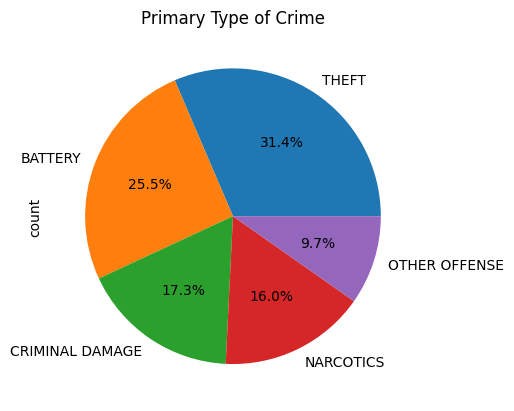

In [304]:
# piechart of the primary type of crime.
plot = df['PRIMARY_TYPE'].value_counts().head(5).plot(kind='pie', title='Primary Type of Crime' , autopct='%1.1f%%' )
plt.show()


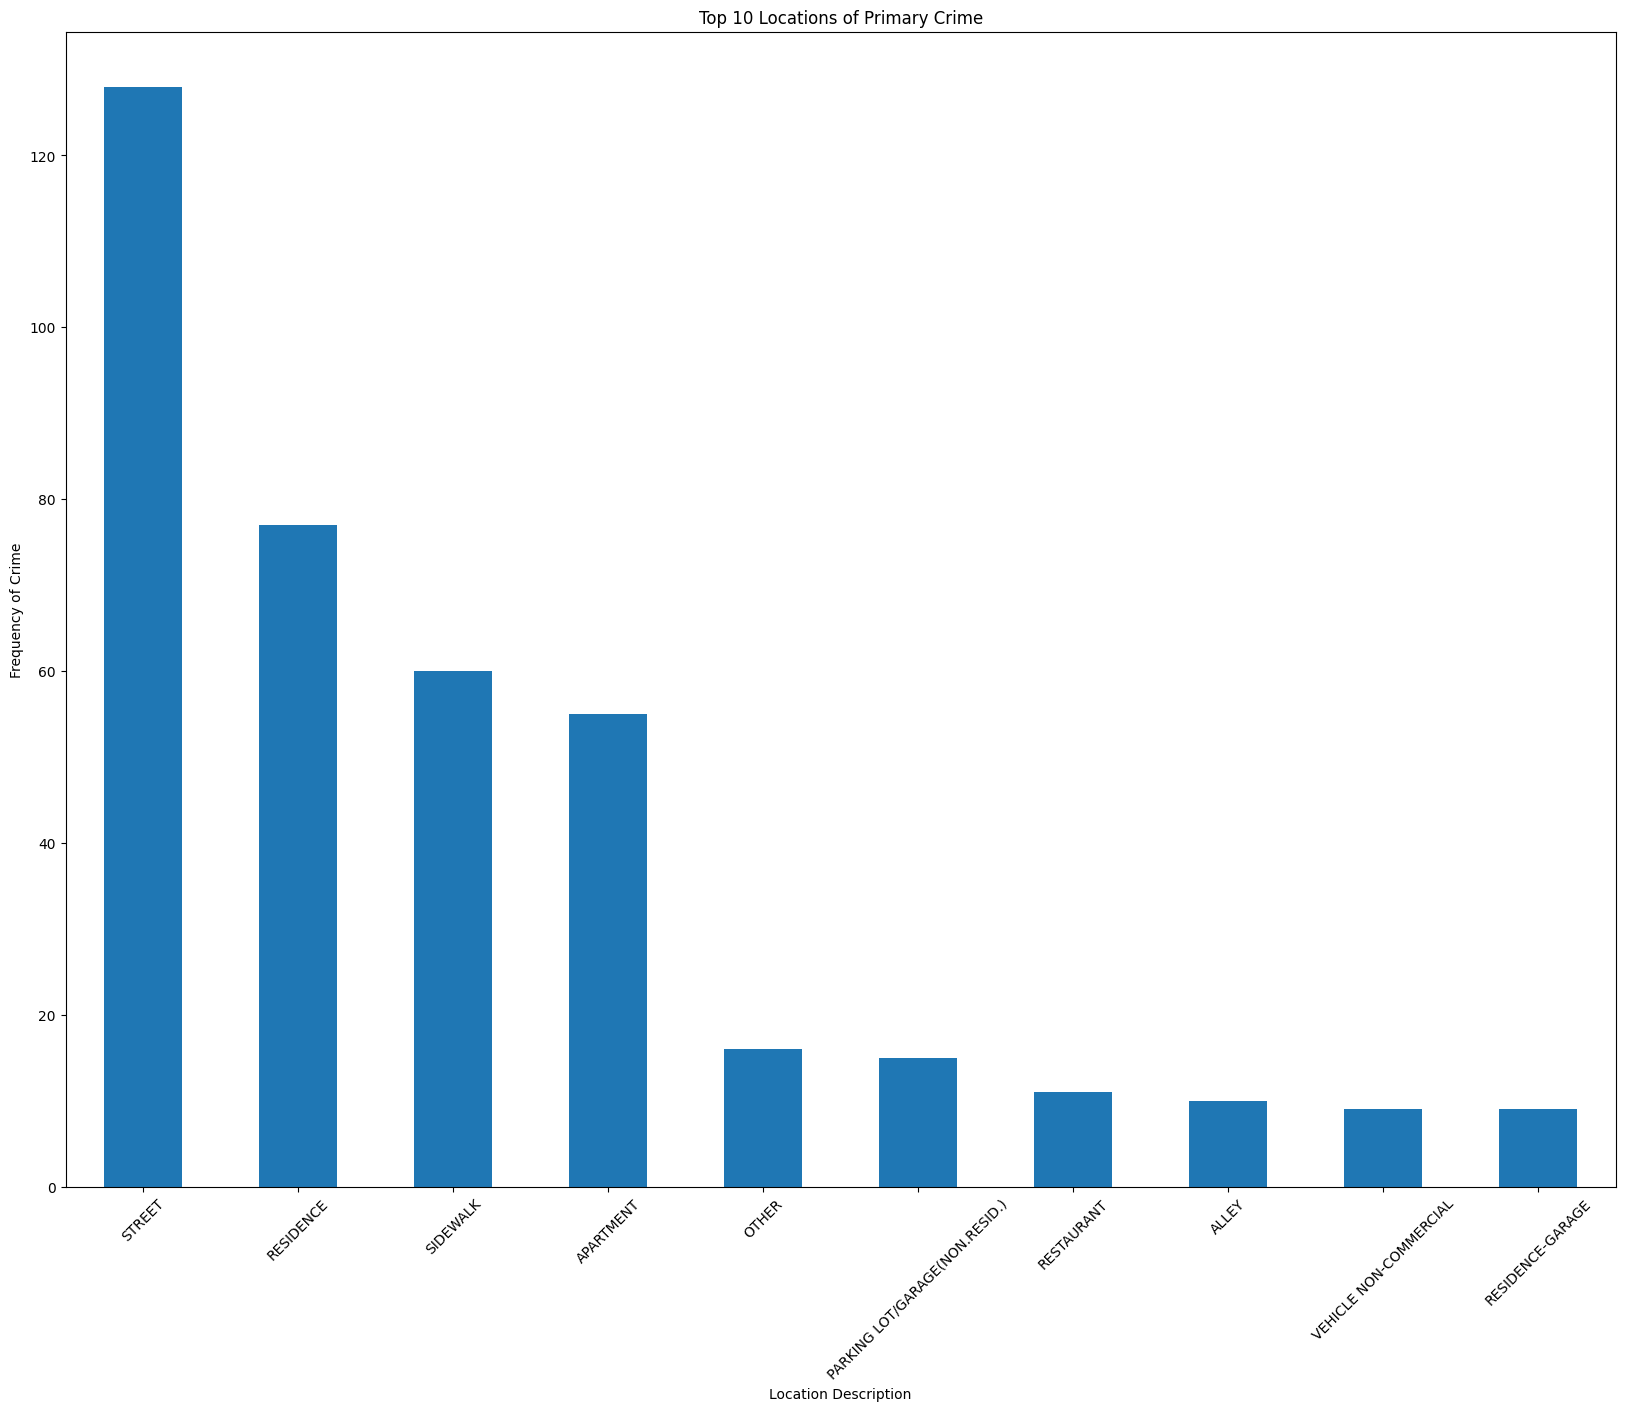

In [305]:
# Plot the frequency of crimes by 10 location descriptions
plt.figure(figsize=(20, 15))
location_plot = (df['LOCATION_DESCRIPTION']).value_counts().head(10).plot(kind='bar', title='Top 10 Locations of Primary Crime')
location_plot.set_xlabel('Location Description')
location_plot.set_ylabel('Frequency of Crime')
plt.xticks(rotation=45)
plt.show()

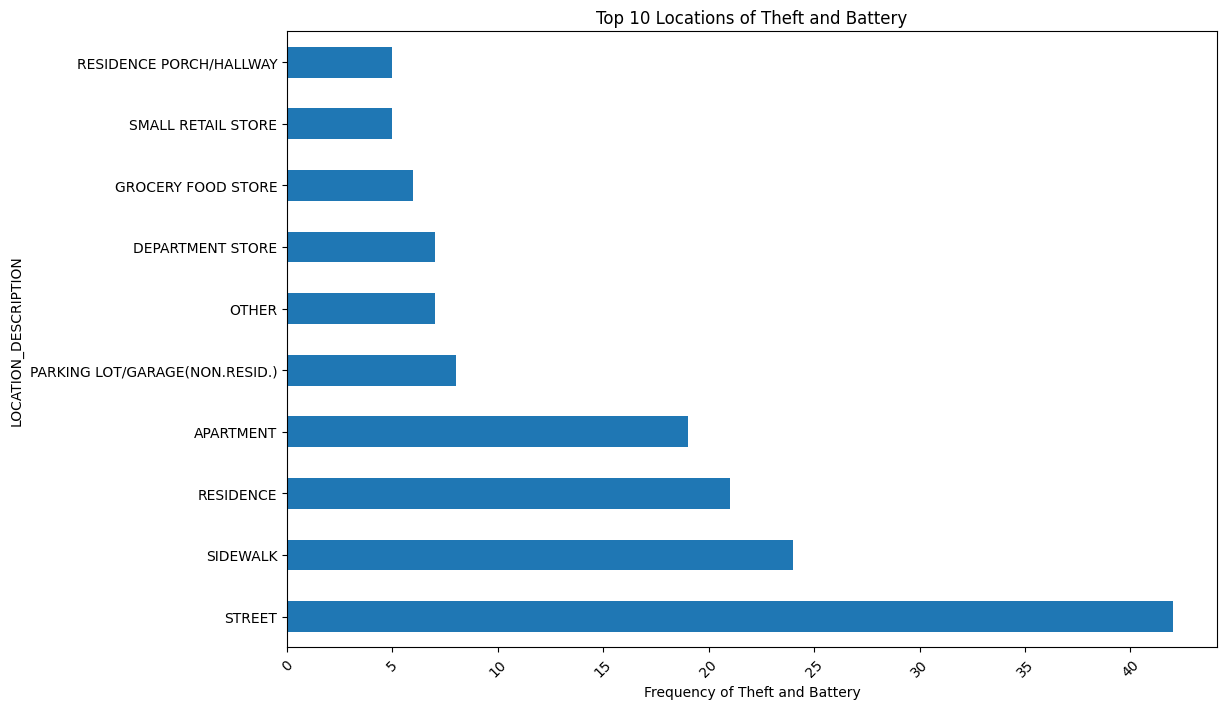

In [306]:
# Plot the frequency of theft and battery by location description
plt.figure(figsize=(12, 8))
Location_PrimType = df.loc[df['PRIMARY_TYPE'].isin(['THEFT', 'BATTERY'])]['LOCATION_DESCRIPTION'].value_counts().head(10).plot(kind='barh', title='Top 10 Locations of Theft and Battery')
Location_PrimType.set_xlabel('Frequency of Theft and Battery')
Location_PrimType.set_ylabel('LOCATION_DESCRIPTION')
plt.xticks(rotation=45)
plt.show()

In [307]:
#Top 2 Locations for Criminal Damage.
print(df.loc[(df['LOCATION_DESCRIPTION'].isin(['STREET', 'RESIDENCE'])) & (df['PRIMARY_TYPE'] == 'CRIMINAL DAMAGE')]['LOCATION_DESCRIPTION'].value_counts().head(2))

LOCATION_DESCRIPTION
STREET       21
RESIDENCE    15
Name: count, dtype: int64


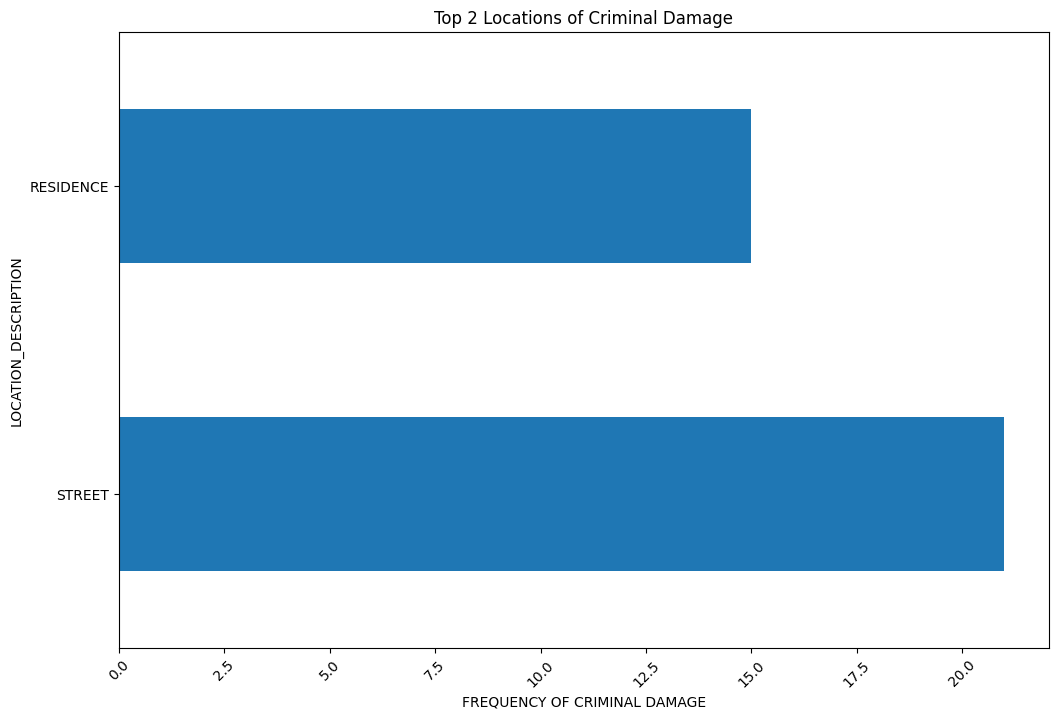

In [ ]:
#Plot showing top 2 locations for Criminal Damage.
plt.figure(figsize=(12, 8))
Location_PrimType = df.loc[df['LOCATION_DESCRIPTION'].isin(['STREET', 'RESIDENCE']) & (df['PRIMARY_TYPE'] == 'CRIMINAL DAMAGE')]['LOCATION_DESCRIPTION'].value_counts().head(2).plot(kind='barh', title='Top 2 Locations of Criminal Damage')
Location_PrimType.set_xlabel('FREQUENCY OF CRIMINAL DAMAGE')
Location_PrimType.set_ylabel('LOCATION_DESCRIPTION')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [363]:
#number of crimes committed per year
print(df.groupby('YEAR')['PRIMARY_TYPE'].count().head(10))

YEAR
2001     1
2002    29
2003    42
2004    33
2005    44
2006    29
2007    36
2008    20
2009    43
2010    25
Name: PRIMARY_TYPE, dtype: int64


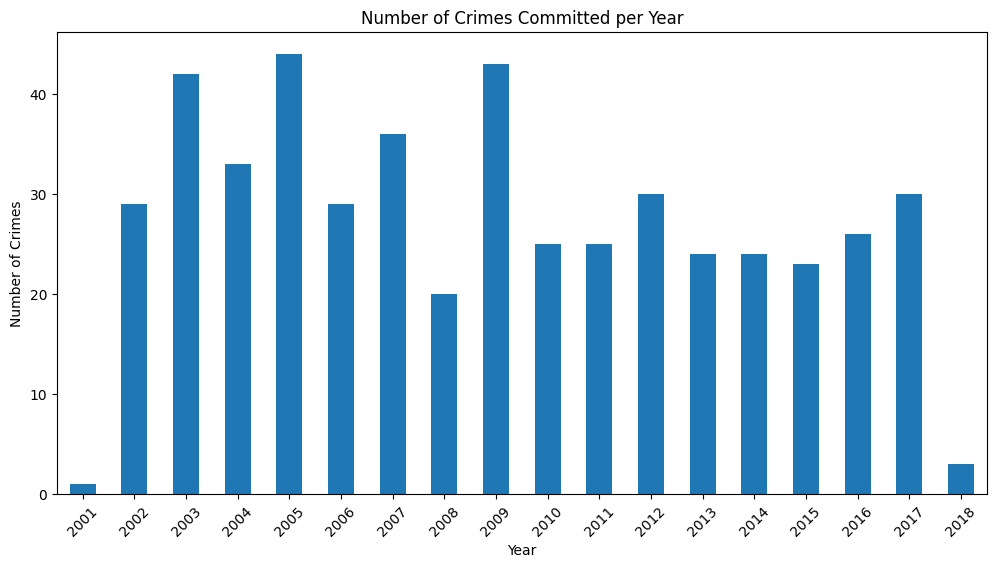

In [385]:
# Create a bar plot of crimes per year
plt.figure(figsize=(12, 6))
df.groupby('YEAR')['PRIMARY_TYPE'].count().plot(kind='bar')
plt.title('Number of Crimes Committed per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

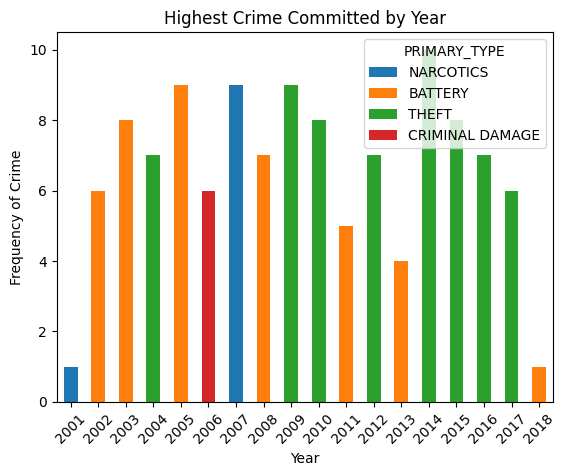

In [365]:
# Plot the highest crime committed by year
plt.figure(figsize=(12, 8))
highest_crime_by_year = df.groupby('YEAR')['PRIMARY_TYPE'].value_counts().groupby(level=0).head(1).unstack().plot(kind='bar', stacked=True)
highest_crime_by_year.set_xlabel('Year')
highest_crime_by_year.set_ylabel('Frequency of Crime')
highest_crime_by_year.set_title('Highest Crime Committed by Year')
plt.xticks(rotation=45)
plt.show()

In [382]:
#map location where the crimes were committed
import folium

# Create a map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add markers for each crime location
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=row['PRIMARY_TYPE'],
        color='red',
        fill=True
    ).add_to(chicago_map)

# Display the map
chicago_map